In [1]:
from sklearn import preprocessing
from sklearn import model_selection

import evopipe
import steps
import warnings

from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = datasets.load_wine()
train_X, test_X, train_Y, test_Y = train_test_split(wine.data, wine.target, test_size = 0.25, random_state = 0)

params = steps.get_params(len(train_X[0]))

In [3]:
print("Format:")
print("------------")
print("Classifier")
print("score")
print("cross-validation score")
print("GridSearch score")
print("------------")
print()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for name, cls in steps.clfs.items():
        classif = cls()
        print(classif.__class__.__name__)
        classif.fit(train_X, train_Y)
        print(classif.score(test_X, test_Y))
        print(model_selection.cross_val_score(classif, test_X, test_Y).mean())
        
        pipe_params = params[name]
        gs = model_selection.GridSearchCV(classif, params,n_jobs=-1, pre_dispatch='2*n_jobs', verbose=5)
        gs.fit(train_X, train_Y)
        
        print(gs.best_params_)
        print(gs.score(test_X, test_Y))
        print()

Format:
------------
Classifier
score
cross-validation score
GridSearch score
------------

SVC
0.5111111111111111
0.4680555555555556


ValueError: Parameter values for parameter (PCA) need to be a sequence(but not a string) or np.ndarray.

In [3]:
clf = evopipe.EvoPipeClassifier(steps.preproc, steps.clfs, params, mutpb=0.5, swap_mutpb=0.2, param_mutpb=0.7,
                                ind_mutpb=0.8)
clf.fit(train_X, train_Y, test_X, test_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))

best_pipes = clf.best_pipelines()

for pipe in best_pipes:
    pipe.fit(train_X, train_Y)
    score = pipe.score(test_X, test_Y)
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Score: {}, Pipe: {}".format(score, pipe_named_steps))


Gen 6:

Hall of fame:
[('gaussianNB', {})]
[('PCA', {'n_components': 9, 'whiten': True}), ('PCA', {'n_components': 9, 'whiten': True}), ('SVC', {'C': 5, 'gamma': 0.01, 'tol': 0.0001})]
[('PCA', {'n_components': 9, 'whiten': True}), ('PCA', {'n_components': 9, 'whiten': False}), ('SGD', {'penalty': 'l2', 'loss': 'log', 'n_iter': 100, 'alpha': 0.0001, 'l1_ratio': 0.5, 'epsilon': 0.05, 'learning_rate': 'constant', 'eta0': 0.1, 'power_t': 2})]
[('PCA', {'n_components': 13, 'whiten': True}), ('gaussianNB', {})]
[('kBest', {'k': 9}), ('DT', {'criterion': 'entropy', 'max_features': 0.05, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 5})]

Gen 11:

Hall of fame:
[('QDA', {'reg_param': 0.0, 'tol': 0.001})]
[('gaussianNB', {})]
[('PCA', {'n_components': 6, 'whiten': True}), ('QDA', {'reg_param': 0.0, 'tol': 0.0001})]
[('PCA', {'n_components': 9, 'whiten': True}), ('PCA', {'n_components': 9, 'whiten': True}), ('SVC', {'C': 5, 'gamma': 0.01, 'tol': 0.0001})]
[('PCA', {'n_component

   	                        fitness                         	                       train_test                       
   	--------------------------------------------------------	--------------------------------------------------------
gen	var        	avg     	min        	max     	var        	avg     	min       	max     
1  	0.0103078  	0.900985	0.565629   	0.966097	0.0157355  	0.87925 	0.415584  	0.964761
2  	0.0163847  	0.870637	0.496189   	0.966097	0.0310177  	0.84097 	0.415584  	1       
3  	0.0123677  	0.867586	0.654025   	0.966097	0.0144996  	0.832518	0.376368  	0.964761
4  	0.0949445  	0.593476	0          	0.966097	0.112109   	0.532816	0         	0.964761
5  	0.112896   	0.681247	0          	0.966097	0.13095    	0.670287	-0.0583942	0.964761
6  	0.21138    	0.603477	0          	0.966097	0.187616   	0.569031	0         	0.964761
7  	0.0141832  	0.925982	0.503104   	0.966097	0.0105225  	0.869196	0.489051  	0.964761
8  	2.67356e-09	0.965903	0.96589    	0.966097	0.000301902	0.960117	0

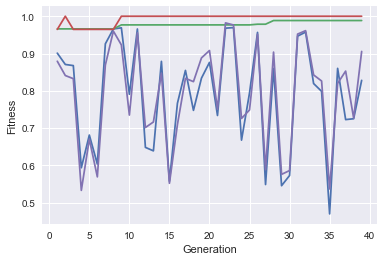

In [4]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.chapters["fitness"].select("avg", "min", "max", "var")
avgs_tt, mins_tt, maxs_tt, vars_tt = clf.logbook.chapters["train_test"].select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gen, avgs, label='Average')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

ax1.plot(gen, maxs, label='Maximum')

ax1.plot(gen, maxs_tt, label='Maximum test')
ax1.plot(gen, avgs_tt, label='Average test')

plt.show()